# Homework №13

## Imports

In [1]:
!pip install diffusers accelerate -q

In [2]:
import torch
from diffusers import StableDiffusionXLImg2ImgPipeline, StableDiffusionXLPipeline
from diffusers.utils import load_image
from PIL import Image
from torchvision import transforms
from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPModel
import pickle

In [3]:
to_256 = transforms.Resize(256)

In [4]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading models

In [6]:
pipe = StableDiffusionXLPipeline.from_pretrained("segmind/SSD-1B",
                                                 torch_dtype=torch.float16,
                                                 use_safetensors=True,
                                                 variant="fp16")
pipe.to(device);

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [72]:
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

## Generating pictures

Категории будут следующие:
- земноводные и рептилии: ящерицы, змеи
- кошачьи: кошки, тигры, львы
- пейзажи: горы, озера
- города: площади, улицы
- люди

In [8]:
SEED = 42
generator = torch.Generator(device).manual_seed(SEED)

In [9]:
results = {
    'lizards': [],
    'cats': [],
    'nature': [],
    'city': [],
    'people': []
}

### Lizards

  0%|          | 0/20 [00:00<?, ?it/s]

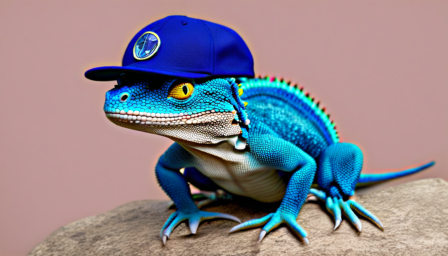

In [10]:
prompt = 'a blue lizard wearing a cap'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=1344,
             guidance_scale=9.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [11]:
results['lizards'].append(gen_image)

  0%|          | 0/20 [00:00<?, ?it/s]

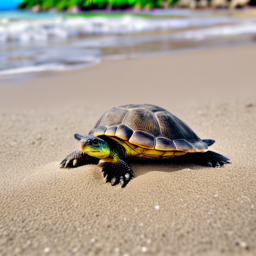

In [12]:
prompt = 'small turtles on the beach'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=768,
             guidance_scale=9.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [13]:
results['lizards'].append(gen_image)

  0%|          | 0/20 [00:00<?, ?it/s]

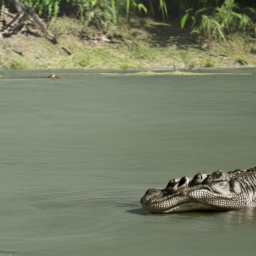

In [14]:
prompt = 'crocodiles in the river'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=768,
             guidance_scale=5.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [15]:
results['lizards'].append(gen_image)

  0%|          | 0/20 [00:00<?, ?it/s]

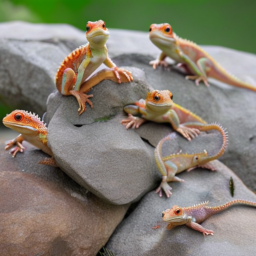

In [16]:
prompt = 'geckos sit on rocks'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=768,
             guidance_scale=5.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [17]:
results['lizards'].append(gen_image)

  0%|          | 0/20 [00:00<?, ?it/s]

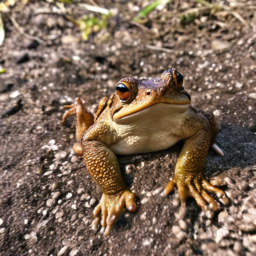

In [18]:
prompt = 'toads sunbathes'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=768,
             guidance_scale=5.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [19]:
results['lizards'].append(gen_image)

  0%|          | 0/20 [00:00<?, ?it/s]

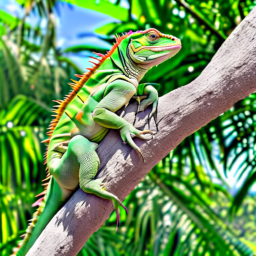

In [20]:
prompt = 'iguana chilling on the tree'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=768,
             guidance_scale=10.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [21]:
results['lizards'].append(gen_image)

### Cats

  0%|          | 0/20 [00:00<?, ?it/s]

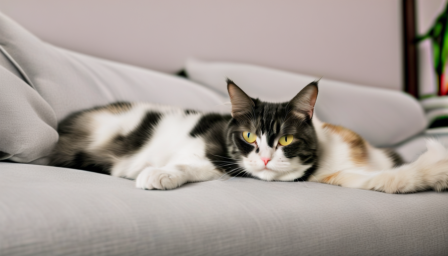

In [22]:
prompt = 'cat lying in the sofa'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=1344,
             guidance_scale=9.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [23]:
results['cats'].append(gen_image)

  0%|          | 0/20 [00:00<?, ?it/s]

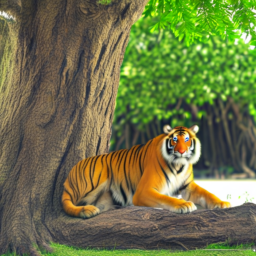

In [24]:
prompt = 'tiger sitting next to tree'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=768,
             guidance_scale=9.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [25]:
results['cats'].append(gen_image)

  0%|          | 0/20 [00:00<?, ?it/s]

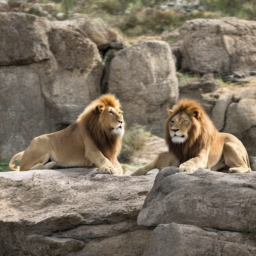

In [26]:
prompt = 'lions chilling on the rocks'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=768,
             guidance_scale=5.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [27]:
results['cats'].append(gen_image)

  0%|          | 0/20 [00:00<?, ?it/s]

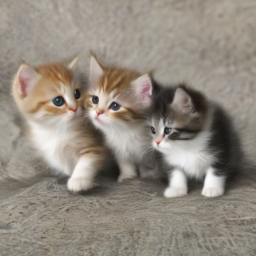

In [28]:
prompt = 'kittens plaing'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=768,
             guidance_scale=5.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [29]:
results['cats'].append(gen_image)

  0%|          | 0/20 [00:00<?, ?it/s]

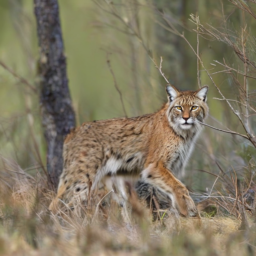

In [30]:
prompt = 'lynx hunting'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=768,
             guidance_scale=5.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [31]:
results['cats'].append(gen_image)

  0%|          | 0/20 [00:00<?, ?it/s]

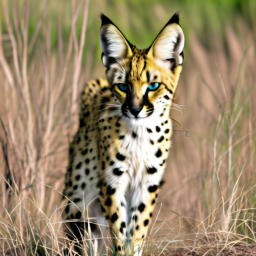

In [32]:
prompt = 'serval'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=768,
             guidance_scale=10.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [33]:
results['cats'].append(gen_image)

### Nature

  0%|          | 0/20 [00:00<?, ?it/s]

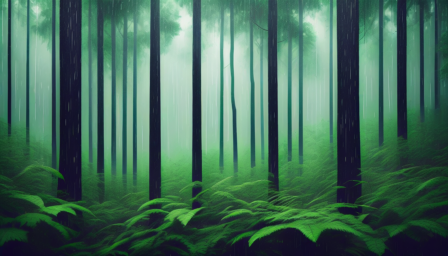

In [34]:
prompt = 'raining forest'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=1344,
             guidance_scale=9.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [35]:
results['nature'].append(gen_image)

  0%|          | 0/20 [00:00<?, ?it/s]

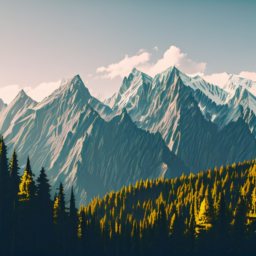

In [36]:
prompt = 'mountains and trees'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=768,
             guidance_scale=9.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [37]:
results['nature'].append(gen_image)

  0%|          | 0/20 [00:00<?, ?it/s]

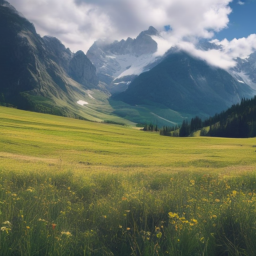

In [38]:
prompt = 'wild field in Alps'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=768,
             guidance_scale=5.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [39]:
results['nature'].append(gen_image)

  0%|          | 0/20 [00:00<?, ?it/s]

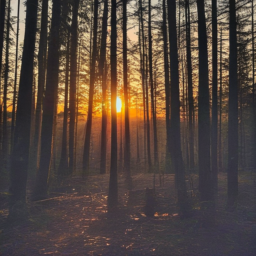

In [40]:
prompt = 'sunset in the woods'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=768,
             guidance_scale=5.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [41]:
results['nature'].append(gen_image)

  0%|          | 0/20 [00:00<?, ?it/s]

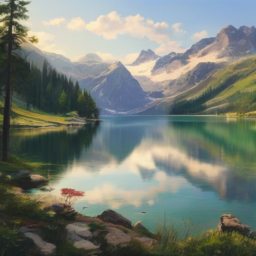

In [42]:
prompt = 'mountain lake'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=768,
             guidance_scale=5.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [43]:
results['nature'].append(gen_image)

  0%|          | 0/20 [00:00<?, ?it/s]

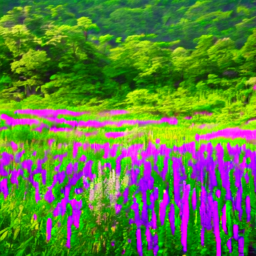

In [44]:
prompt = 'nature'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=768,
             guidance_scale=10.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [45]:
results['nature'].append(gen_image)

### City

  0%|          | 0/20 [00:00<?, ?it/s]

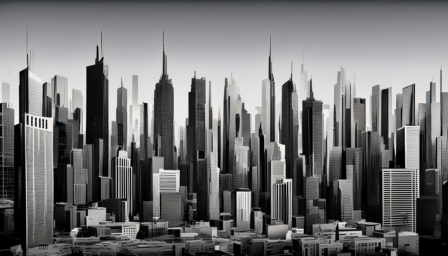

In [46]:
prompt = 'big city'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=1344,
             guidance_scale=9.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [47]:
results['city'].append(gen_image)

  0%|          | 0/20 [00:00<?, ?it/s]

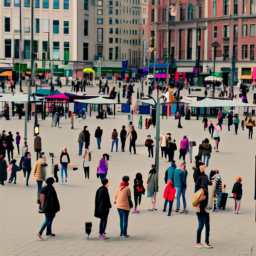

In [48]:
prompt = 'central square with people'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=768,
             guidance_scale=9.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [49]:
results['city'].append(gen_image)

  0%|          | 0/20 [00:00<?, ?it/s]

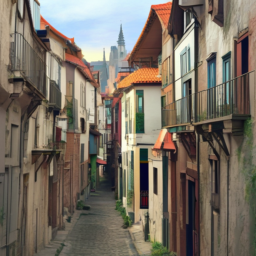

In [50]:
prompt = 'a small street with high houses'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=768,
             guidance_scale=5.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [51]:
results['city'].append(gen_image)

  0%|          | 0/20 [00:00<?, ?it/s]

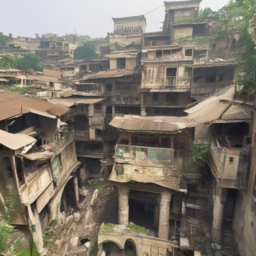

In [52]:
prompt = 'old palace surrounded by slums'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=768,
             guidance_scale=5.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [53]:
results['city'].append(gen_image)

  0%|          | 0/20 [00:00<?, ?it/s]

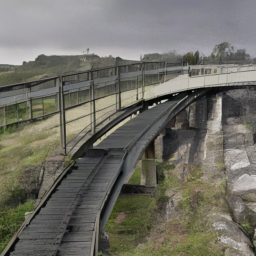

In [54]:
prompt = 'the bridge over the railway'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=768,
             guidance_scale=5.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [55]:
results['city'].append(gen_image)

  0%|          | 0/20 [00:00<?, ?it/s]

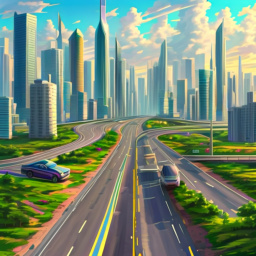

In [56]:
prompt = 'highway to megapolis'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=768,
             guidance_scale=10.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [57]:
results['city'].append(gen_image)

### People

  0%|          | 0/20 [00:00<?, ?it/s]

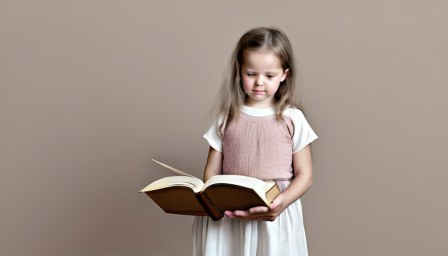

In [58]:
prompt = 'small girl with a book'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=1344,
             guidance_scale=9.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [59]:
results['people'].append(gen_image)

  0%|          | 0/20 [00:00<?, ?it/s]

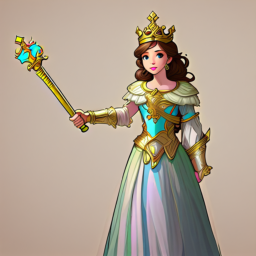

In [60]:
prompt = 'a princess with a scepter'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=768,
             guidance_scale=9.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [61]:
results['people'].append(gen_image)

  0%|          | 0/20 [00:00<?, ?it/s]

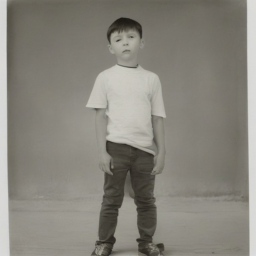

In [62]:
prompt = 'a boy with a ball'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=768,
             guidance_scale=5.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [63]:
results['people'].append(gen_image)

  0%|          | 0/20 [00:00<?, ?it/s]

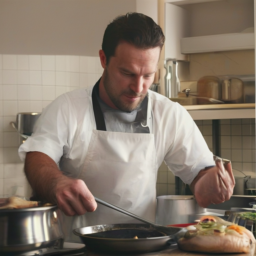

In [64]:
prompt = 'a man cooking'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=768,
             guidance_scale=5.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [65]:
results['people'].append(gen_image)

  0%|          | 0/20 [00:00<?, ?it/s]

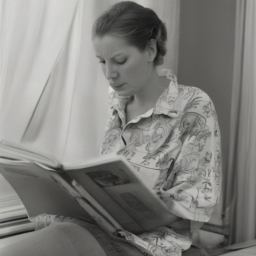

In [66]:
prompt = 'a woman reading a magasine'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=768,
             guidance_scale=5.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [67]:
results['people'].append(gen_image)

  0%|          | 0/20 [00:00<?, ?it/s]

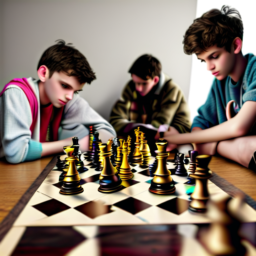

In [68]:
prompt = 'teenages plaing chess'
gen_image = pipe(prompt,
             generator=generator,
             height=768,
             width=768,
             guidance_scale=10.0,
             num_inference_steps=20,
    ).images[0]
to_256(gen_image)

In [69]:
results['people'].append(gen_image)

In [70]:
with open('/content/drive/MyDrive/nnlp/actprob/pictures.pkl', 'wb') as f:
    pickle.dump(results, f)

## Vectorizing

In [125]:
def vectorize(data):
    labels = []
    vecs = []
    pics = []

    for key in data:
        labels.extend([key for i in range(len(data[key]))])
        pics.extend(data[key])

        inputs = processor(text=['', ], images=results['cats'], return_tensors="pt", padding=True)
        outputs = model(**inputs)
        vecs.append(outputs['image_embeds'])

    vecs = torch.vstack(vecs).detach().cpu()
    return pics, vecs, labels

In [ ]:
with open('/content/drive/MyDrive/nnlp/actprob/pictures.pkl', 'rb') as f:
    results = pickle.load(f)

In [126]:
pics, vecs, labels = vectorize(results)

## Clustering

In [156]:
!pip install optuna hdbscan -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 76.5 MB/s eta 0:00:00


In [161]:
import optuna
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.cluster import v_measure_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_distances
import hdbscan
import pandas as pd

In [122]:
le = LabelEncoder()
lbl = le.fit_transform(labels)

In [123]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto")
kmeans.fit(vecs)
v_measure_score(lbl, kmeans.labels_)

0.0

In [128]:
df = pd.DataFrame()
df['picture'] = pics
df['labels'] = labels
df['lbl'] = lbl
df['kmeans_classes'] = kmeans.labels_

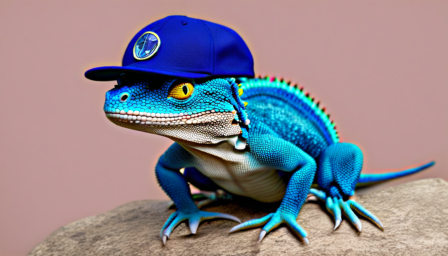

In [136]:
to_256(df[df.kmeans_classes == 0].picture.iloc[0])

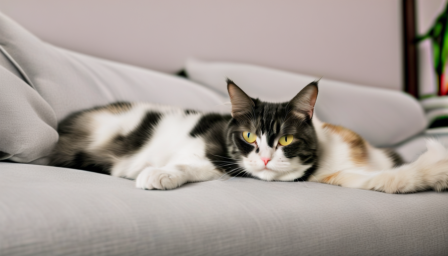

In [135]:
to_256(df[df.kmeans_classes == 0].picture.iloc[1])

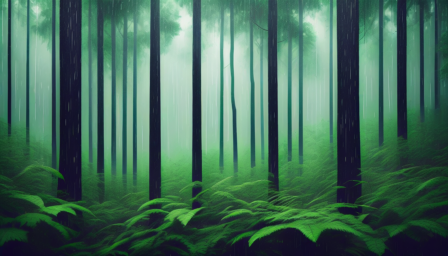

In [137]:
to_256(df[df.kmeans_classes == 0].picture.iloc[2])

KMeans, бессмысленный и беспощадный. А вообще, это неудивительно, что он не справился: он же выделяет выпуклые штуки, а тут странно ожидать хорошей геометрии

In [141]:
aggl = AgglomerativeClustering(n_clusters=5)
aggl.fit(vecs);

In [143]:
v_measure_score(lbl, aggl.labels_)

0.0

In [142]:
df['aggl_classes'] = aggl.labels_

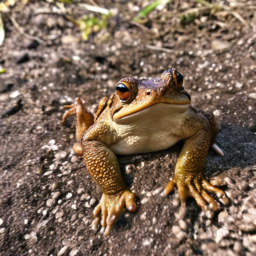

In [145]:
to_256(df[df.aggl_classes == 0].picture.iloc[0])

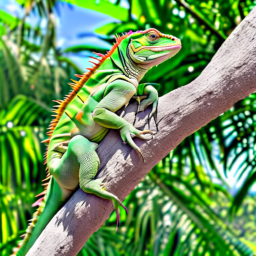

In [146]:
to_256(df[df.aggl_classes == 0].picture.iloc[1])

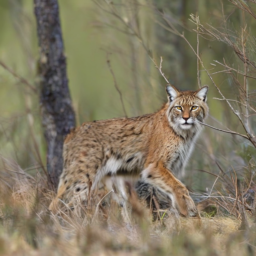

In [147]:
to_256(df[df.aggl_classes == 0].picture.iloc[2])

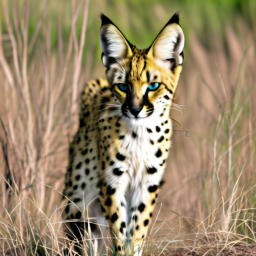

In [148]:
to_256(df[df.aggl_classes == 0].picture.iloc[3])

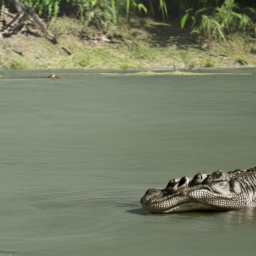

In [149]:
to_256(df[df.aggl_classes == 1].picture.iloc[0])

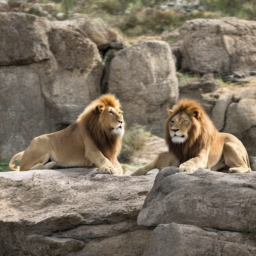

In [151]:
to_256(df[df.aggl_classes == 1].picture.iloc[1])

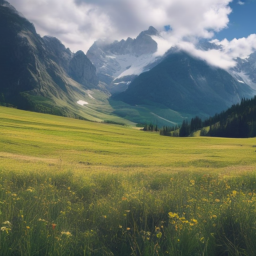

In [152]:
to_256(df[df.aggl_classes == 1].picture.iloc[2])

И все еще ничего не работает, хотя есть ощущение, что он их как-то по цвету (оттенкам) группирует

In [168]:
def objective(trial):
    mncl = trial.suggest_int('min_cluster_size', 2, 50, step=3)
    mns = trial.suggest_int('min_samples', 1, 15)
    eps = trial.suggest_float('cluster_selection_epsilon', 0.01, 0.5)
    ls = trial.suggest_int('leaf_size', 1, 15)

    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=mncl,
        min_samples=mns,
        cluster_selection_epsilon=eps,
        leaf_size=ls
        )
    clusterer.fit(vecs)
    vm = v_measure_score(lbl, clusterer.labels_)
    return 1 - vm

In [172]:
study = optuna.create_study()
study.optimize(objective, n_trials=1000, show_progress_bar=True)

[I 2024-05-30 21:47:33,840] A new study created in memory with name: no-name-521d6751-d8a6-45bf-9ea1-95b8cb39acd4


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2024-05-30 21:47:33,891] Trial 0 finished with value: 0.8967219616684642 and parameters: {'min_cluster_size': 2, 'min_samples': 13, 'cluster_selection_epsilon': 0.10492208625824272, 'leaf_size': 8}. Best is trial 0 with value: 0.8967219616684642.
[I 2024-05-30 21:47:33,908] Trial 1 finished with value: 1.0 and parameters: {'min_cluster_size': 29, 'min_samples': 6, 'cluster_selection_epsilon': 0.32588146977627724, 'leaf_size': 4}. Best is trial 0 with value: 0.8967219616684642.
[I 2024-05-30 21:47:33,924] Trial 2 finished with value: 1.0 and parameters: {'min_cluster_size': 17, 'min_samples': 7, 'cluster_selection_epsilon': 0.2835102042349922, 'leaf_size': 12}. Best is trial 0 with value: 0.8967219616684642.
[I 2024-05-30 21:47:33,942] Trial 3 finished with value: 1.0 and parameters: {'min_cluster_size': 20, 'min_samples': 3, 'cluster_selection_epsilon': 0.4697360429865769, 'leaf_size': 4}. Best is trial 0 with value: 0.8967219616684642.
[I 2024-05-30 21:47:33,966] Trial 4 finished w

In [174]:
study.best_params, study.best_value

({'min_cluster_size': 2,
  'min_samples': 13,
  'cluster_selection_epsilon': 0.10492208625824272,
  'leaf_size': 8},
 0.8967219616684642)

In [175]:
clusterer = hdbscan.HDBSCAN(**study.best_params)
clusterer.fit(vecs)
v_measure_score(lbl, clusterer.labels_)

0.10327803833153579

In [176]:
df['hdbscan_classes'] = clusterer.labels_

In [177]:
df

picture   labels  lbl  \
0   <PIL.Image.Image image mode=RGB size=1344x768 ...  lizards    2   
1   <PIL.Image.Image image mode=RGB size=768x768 a...  lizards    2   
2   <PIL.Image.Image image mode=RGB size=768x768 a...  lizards    2   
3   <PIL.Image.Image image mode=RGB size=768x768 a...  lizards    2   
4   <PIL.Image.Image image mode=RGB size=768x768 a...  lizards    2   
5   <PIL.Image.Image image mode=RGB size=768x768 a...  lizards    2   
6   <PIL.Image.Image image mode=RGB size=1344x768 ...     cats    0   
7   <PIL.Image.Image image mode=RGB size=768x768 a...     cats    0   
8   <PIL.Image.Image image mode=RGB size=768x768 a...     cats    0   
9   <PIL.Image.Image image mode=RGB size=768x768 a...     cats    0   
10  <PIL.Image.Image image mode=RGB size=768x768 a...     cats    0   
11  <PIL.Image.Image image mode=RGB size=768x768 a...     cats    0   
12  <PIL.Image.Image image mode=RGB size=1344x768 ...   nature    3   
13  <PIL.Image.Image image mode=RGB size=768x768 a...   nature    3   
14  <PIL.Image.Image image mode=RGB size=768x768 a...   nature    3   
15  <PIL.Image.Image image mode=RGB size=768x768 a...   nature    3   
16  <PIL.Image.Image image mode=RGB size=768x768 a...   nature    3   
17  <PIL.Image.Image image mode=RGB size=768x768 a...   nature    3   
18  <PIL.Image.Image image mode=RGB size=1344x768 ...     city    1   
19  <PIL.Image.Image image mode=RGB size=768x768 a...     city    1   
20  <PIL.Image.Image image mode=RGB size=768x768 a...     city    1   
21  <PIL.Image.Image image mode=RGB size=768x768 a...     city    1   
22  <PIL.Image.Image image mode=RGB size=768x768 a...     city    1   
23  <PIL.Image.Image image mode=RGB size=768x768 a...     city    1   
24  <PIL.Image.Image image mode=RGB size=1344x768 ...   people    4   
25  <PIL.Image.Image image mode=RGB size=768x768 a...   people    4   
26  <PIL.Image.Image image mode=RGB size=768x768 a...   people    4   
27  <PIL.Image.Image image mode=RGB size=768x768 a...   people    4   
28  <PIL.Image.Image image mode=RGB size=768x768 a...   people    4   
29  <PIL.Image.Image image mode=RGB size=768x768 a...   people    4   

    kmeans_classes  aggl_classes  hdbscan_classes  
0                0             4                0  
1                2             3                1  
2                3             1                1  
3                4             2                1  
4                1             0                1  
5                1             0                1  
6                0             4               -1  
7                2             3                1  
8                3             1                1  
9                4             2                1  
10               1             0                1  
11               1             0                1  
12               0             4                0  
13               2             3                1  
14               3             1                1  
15               4             2                1  
16               1             0                1  
17               1             0                1  
18               0             4               -1  
19               2             3                1  
20               3             1                1  
21               4             2                1  
22               1             0                1  
23               1             0                1  
24               0             4               -1  
25               2             3                1  
26               3             1                1  
27               4             2                1  
28               1             0                1  
29               1             0                1

Все равно ерунду кластеризует. Мне кажется, я переусложнила с картинками, слишком общие получились тематики, даже оптуна не справилась (хотя я не профессионал в ее использовании)